In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.external as sce
import scvi

In [2]:
combo = sc.read_h5ad('../data/sc/combo.h5ad')
GSE = sc.read_10x_mtx('../data/sc/GSE226488/')

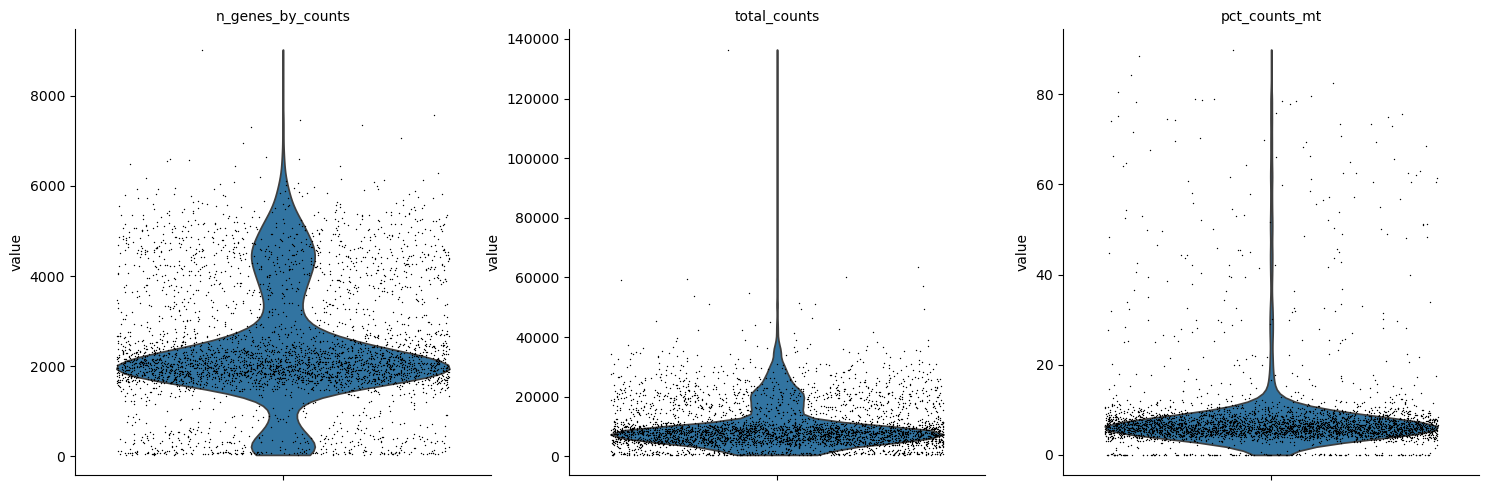

In [3]:
def qc(ad):
    ad.var['mt'] = ad.var.index.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(ad, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
    return ad
GSE = qc(GSE)

sc.pl.violin(
    GSE,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)


In [ ]:
## QC

In [4]:
GSE.obs['batch'] = 'GSE'
GSE.layers['counts'] = GSE.X.copy()
combo = sc.concat([combo, GSE])

/Users/gas361/miniconda3/envs/sc_2024/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


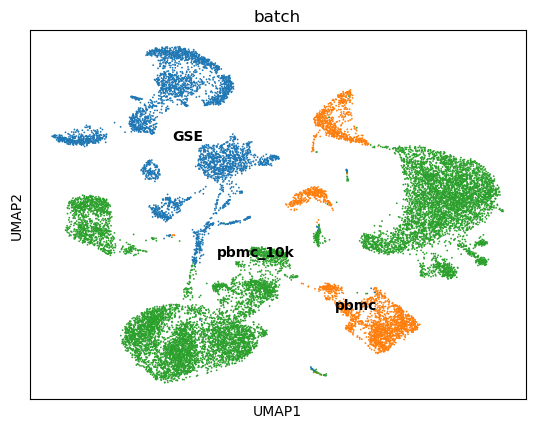

In [5]:
sc.pp.normalize_total(combo, target_sum=1e4)
sc.pp.log1p(combo)
sc.pp.scale(combo)
sc.pp.pca(combo)
sc.pp.neighbors(combo)
sc.tl.umap(combo)
sc.pl.umap(combo, color='batch', legend_loc='on data')

2024-11-07 11:31:46,134 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-07 11:31:47,940 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-07 11:31:47,997 - harmonypy - INFO - Iteration 1 of 20
2024-11-07 11:31:49,727 - harmonypy - INFO - Iteration 2 of 20
2024-11-07 11:31:51,452 - harmonypy - INFO - Iteration 3 of 20
2024-11-07 11:31:53,166 - harmonypy - INFO - Iteration 4 of 20
2024-11-07 11:31:54,897 - harmonypy - INFO - Converged after 4 iterations


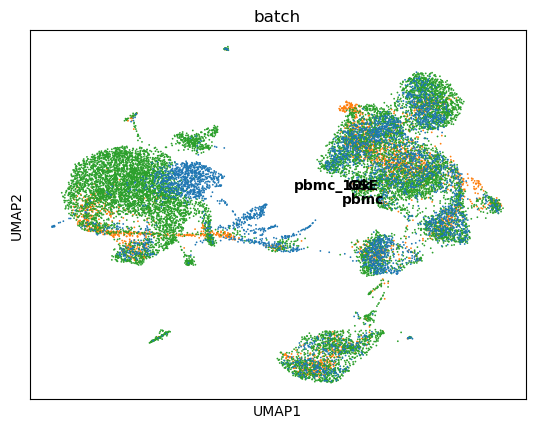

In [6]:
combo.X = combo.layers['counts'].copy()
sc.pp.normalize_total(combo, target_sum=1e4)
sc.pp.log1p(combo)

sce.pp.harmony_integrate(combo, 'batch', max_iter_harmony=20)
sc.pp.neighbors(combo, use_rep='X_pca_harmony')
sc.tl.umap(combo)
sc.pl.umap(combo, color='batch', legend_loc='on data')

[]

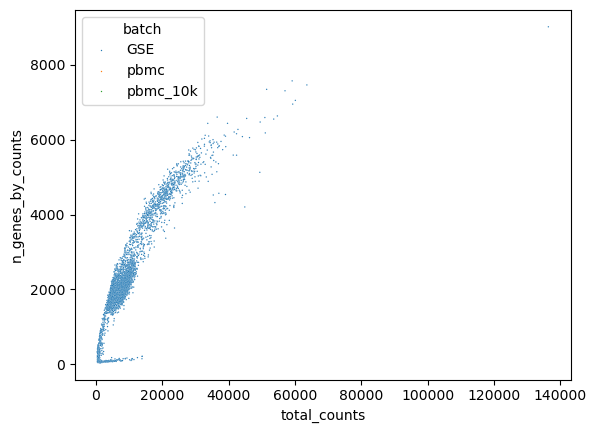

In [16]:
# marker_genes = {
#     'T-cell': ['CD3D'],
#     'CD4 T cells': ['IL7R'],
#     'CD14+ Monocytes': ['CD14', 'LYZ'],
#     'B cells': ['MS4A1','CD79A'],
#     'CD8 T cells': ['CD8A','CD8B'],
#     'NK cells': ['GNLY', 'NKG7'],
#     'FCGR3A+ Monocytes': ['FCGR3A', 'MS4A7'],
#     'Dendritic Cells': ['FCER1A', 'CST3'],
#     'Megakaryocytes': ['PPBP'],
#     'Myeloid': ['CST3'],
# }
# marker_matches = sc.tl.marker_gene_overlap(combo, marker_genes)
# sns.heatmap(marker_matches)
sns.scatterplot(combo.obs[combo.obs.batch.eq('GSE')], x='total_counts', y='n_genes_by_counts', hue='batch', s=1)
plt.plot()


[]

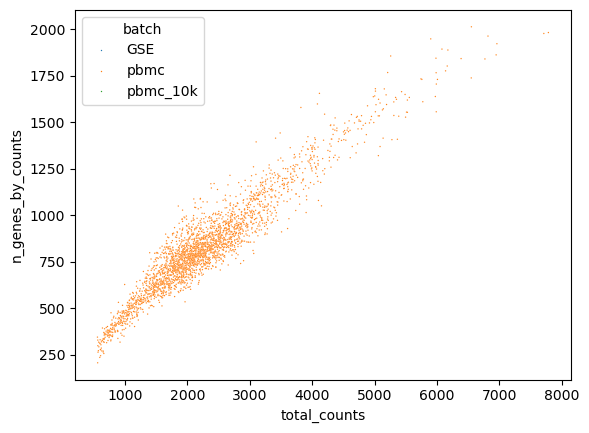

In [17]:
sns.scatterplot(combo.obs[combo.obs.batch.eq('pbmc')], x='total_counts', y='n_genes_by_counts', hue='batch', s=1)
plt.plot()


[]

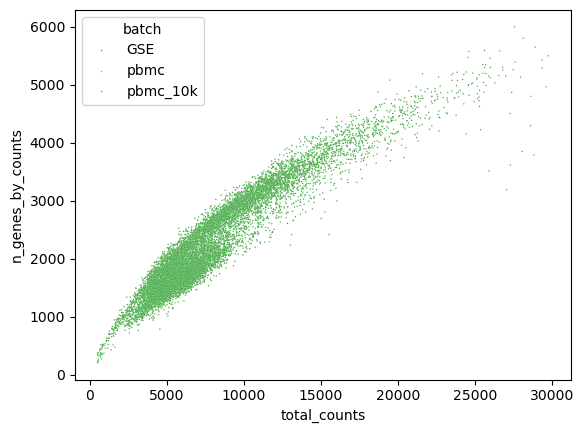

In [18]:
sns.scatterplot(combo.obs[combo.obs.batch.eq('pbmc_10k')], x='total_counts', y='n_genes_by_counts', hue='batch', s=1)
plt.plot()

In [9]:
combo.obs


,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batch
AAACATACAACCAC-1,764,2338.0,0.0,0.000000,pbmc
AAACATTGAGCTAC-1,1336,4703.0,0.0,0.000000,pbmc
AAACATTGATCAGC-1,1121,3110.0,0.0,0.000000,pbmc
AAACCGTGCTTCCG-1,945,2576.0,0.0,0.000000,pbmc
AAACCGTGTATGCG-1,516,959.0,0.0,0.000000,pbmc
...,...,...,...,...,...
TTTGTTGCACCCAATA-1,1908,6504.0,485.0,7.456949,GSE
TTTGTTGGTGGGACAT-1,1873,6271.0,501.0,7.989156,GSE
TTTGTTGGTTAGGAGC-1,1826,8508.0,380.0,4.466385,GSE
TTTGTTGGTTGGGACA-1,2104,5996.0,360.0,6.004003,GSE


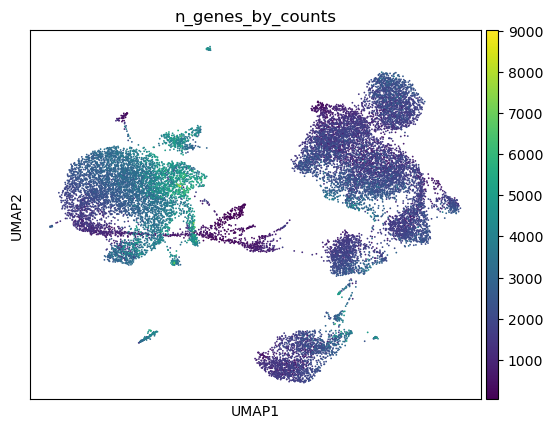

In [21]:
sc.pl.umap(combo, color='n_genes_by_counts', legend_loc='on data')

/var/folders/2b/hn8_09990210yhfm3zc7p3jh0000gn/T/ipykernel_36536/3025505524.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(combo)


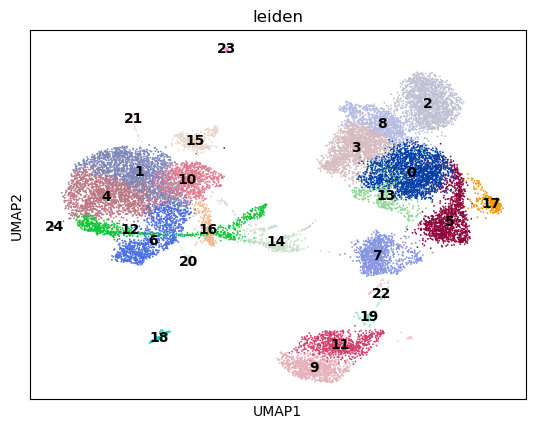

In [22]:
sc.tl.leiden(combo)
sc.pl.umap(combo, color='leiden', legend_loc='on data')

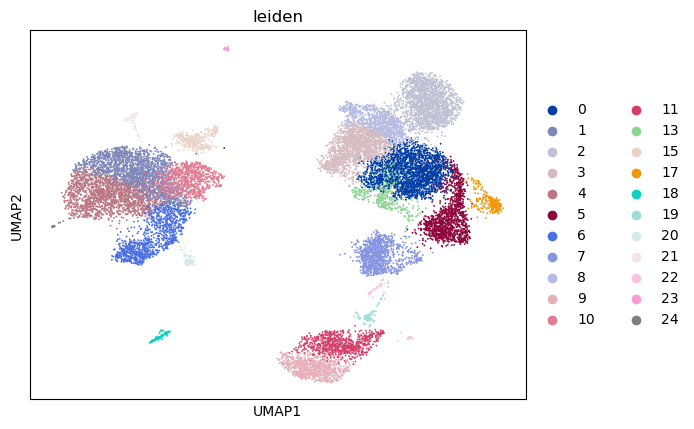

In [27]:
sc.pl.umap(combo[~combo.obs.leiden.isin(['14','16','12'])], color='leiden')